In [2]:
# Validating decision trees
    # new workflow: train > validate > test (test data only used for final evaluation on champion model)
        # true test data has never been seen before; tuning your model to test data and 
        # re-evaluating biases the model. True test data not used to tune model whatsoever. 
        # this is the role of "validation data". 
# Goal: build decision tree (DT) using bank churn data to predict whether customers will churn. 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

In [14]:
df = pd.read_csv('/Users/micahevalt/Downloads/Churn_Modelling.csv')

In [6]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


If you highlight a cell and press the 'm' key, you can create a non-code cell and just type stuff!

In [7]:
# game-changer ^

In [11]:
# missing values and feature selection

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [15]:
# drop non-predictive columns. reminder: outcome var is "Exited"
df = df.drop(columns = ['RowNumber', 'CustomerId', 'Surname', 'Gender'])
df.columns

Index(['CreditScore', 'Geography', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [17]:
# examine data types (esp. numeric vs. non-numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Age              10000 non-null  int64  
 3   Tenure           10000 non-null  int64  
 4   Balance          10000 non-null  float64
 5   NumOfProducts    10000 non-null  int64  
 6   HasCrCard        10000 non-null  int64  
 7   IsActiveMember   10000 non-null  int64  
 8   EstimatedSalary  10000 non-null  float64
 9   Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 781.4+ KB


In [21]:
df.shape

(10000, 10)

In [24]:
# Only non-numeric variable is 'Geography'; let's encode via dummy vars. 
# "drop_first = True" reduces column output by 1; "dtype = float" gives us 0's and 1's vs. T/F

df = pd.get_dummies(df, drop_first = True, dtype = float)
df.shape

(10000, 11)

In [34]:
# define x and y split for model
x = df.copy()
x = x.drop(columns = 'Exited')

y = df['Exited']

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, 
                                                    stratify = y, random_state = 42)

In [36]:
# didn't examine this explicitly in this notebook, but outcome variable is about 80:20 split;
    # "stratify = y" ensures that both train and test data will retain this class ratio after splitting
y.value_counts(normalize = True)*100

Exited
0    79.63
1    20.37
Name: proportion, dtype: float64

In [43]:
# model building:

# instantiate the model
dtree = DecisionTreeClassifier(random_state = 0)
dtree.fit(x_train, y_train)
dtree_pred = dtree.predict(x_test)
dtree_pred_df = pd.DataFrame(dt_pred) # <-- just converting to a df rq to use value_counts method 
dtree_pred_df.value_counts(normalize = True)*100

0    78.92
1    21.08
Name: proportion, dtype: float64

In [53]:
# generate performance metrics

print('Accuracy:', '%.3f' % accuracy_score(y_test, dtree_pred))
print('Precision:', '%.3f' % precision_score(y_test, dtree_pred))
print('Recall:', '%.3f' % recall_score(y_test, dtree_pred))
print('F1 Score:', '%.3f' % f1_score(y_test, dtree_pred))

Accuracy: 0.790
Precision: 0.486
Recall: 0.503
F1 Score: 0.494


In [62]:
comparison_df = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'],
                             data = [
                                 ['Decision Tree', 0.790, 0.486, 0.503, 0.494],
                                 ['Naive Bayes', 0.821, 0.597, 0.369, 0.456]
                             ]
                            )
comparison_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,0.790,0.486,0.503,0.494
1,Naive Bayes,0.821,0.597,0.369,0.456


In [63]:
# Naive Bayes evaluation data from same dataset several notebooks ago. 
    # Decision Tree is an improvement according to F1 score, which is the metric we decided
        # to use in the Naive_Bayes notebook. 

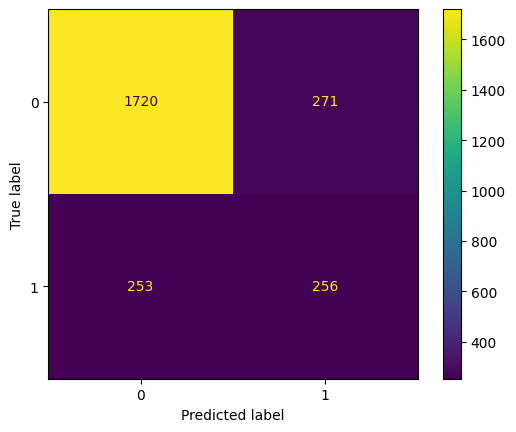

In [72]:
# Post-analysis via CM

cm = confusion_matrix(y_test, dtree_pred, labels = dtree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = dtree.classes_)
disp.plot()

In [73]:
y_test.value_counts()

Exited
0    1991
1     509
Name: count, dtype: int64

In [74]:
# model predicted most of the true negatives, about half of the true positives,
    # and the FN/FP ratio is relatively balanced. 

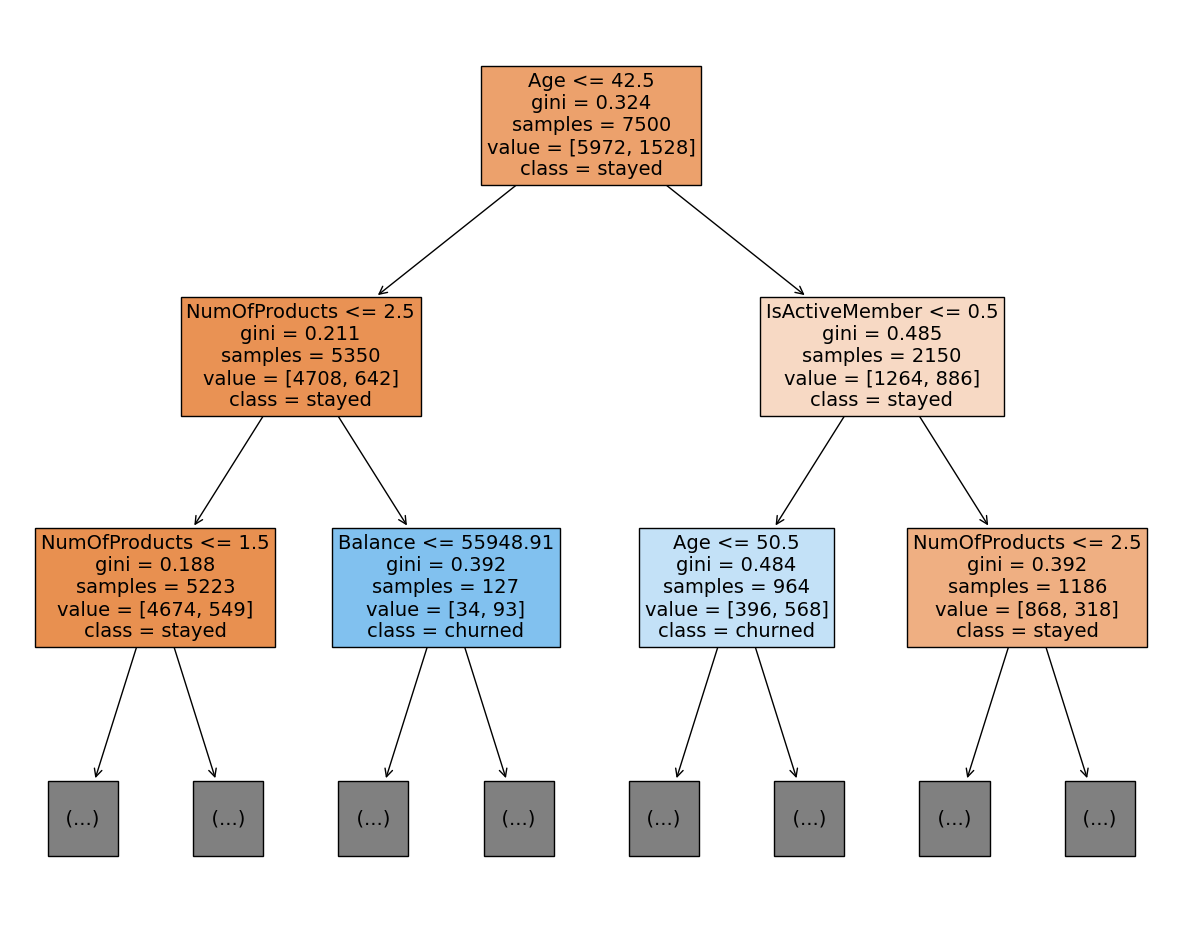

In [76]:
# plot the tree

from sklearn.tree import plot_tree

plt.figure(figsize = (15, 12))
plot_tree(dtree, max_depth = 2, fontsize = 14, feature_names = x.columns, 
          class_names = {0: 'stayed', 1: 'churned'}, filled = True);
plt.show()

In [77]:
# NOTE: we are testing several models with the same Churn df, and evaluating each model using the 
        # same data. Ideally, we'd tune the hyperparameters of each model (using the same data or not),
        # then score all the models on separate validation data and perform model selection based on this.
        # Finally, we'd score the champion model on the test holdout data that we have never seen.

In [78]:
# speaking of tuning hyperparameters...

from sklearn.model_selection import GridSearchCV

tree_parameters = {'max_depth': [4,5,6,7,8,9,10,11,12,15,20,30,40,50],
                   'min_samples_leaf': [ 2, 5, 10, 20, 50]
                  }
tuned_dtree = DecisionTreeClassifier(random_state = 42)

In [88]:
%%time
# ^ putting this at the top of a cell will print processing time to run 

clf = GridSearchCV(tuned_dtree,
                   tree_parameters,
                   scoring = ['accuracy', 'precision', 'recall', 'f1'],
                   cv = 5,
                   refit = 'f1')

# this code instantiates the classifier, taking in parameters, random state, cross-validation (# folds),
    # scoring parameters, and refit (this tells the classifier that once the best model is chosen,
    # retrain this model on ALL the data (with a 5-fold cross-validation , the model is only trained on
    # 4/5 of the folds, or 80%. Once the best hyperparameters are selected (based on 'f1' in this case),
    # it is fit to 100% of the train data. Neat!

# Note that we made a new decision tree. It's up to us to make sure this new classifier is tuned to the 
    # same data.

CPU times: user 26 µs, sys: 1 µs, total: 27 µs
Wall time: 36 µs


In [90]:
%%time

clf.fit(x_train, y_train)

CPU times: user 10.7 s, sys: 115 ms, total: 10.8 s
Wall time: 10.9 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50],
                         'min_samples_leaf': [2, 5, 10, 20, 50]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [94]:
# examine best model

print(clf.best_estimator_)
print(clf.best_score_)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=20, random_state=42)
0.5606550690451619


In [95]:
# based on our grid search options, the model hyperparameters which led to the highest
    # F1 score were max_depth = 8, min_samples_leaf = 20

In [98]:
def make_results(model_name, model_object):
    '''
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.
  
    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.  
    '''

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    # Create table of results
    table = pd.DataFrame({'Model': [model_name],
                          'F1': [f1],
                          'Recall': [recall],
                          'Precision': [precision],
                          'Accuracy': [accuracy]
                         }
                        )
  
    return table

In [100]:
result_table = make_results("Tuned DTree", clf)
result_table

,Model,F1,Recall,Precision,Accuracy
0,Tuned DTree,0.560655,0.469255,0.701608,0.8504


In [101]:
result_table.to_csv("Dtree_w_validation_results.csv")